# Analysis of Airbnb Seattle Data Set

In [262]:
# Load important python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/thomas/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Dataset
The data set can be found under the following link on the kaggle website:
https://www.kaggle.com/airbnb/seattle

Along with the data you can also find a description of the data under the link above.

In [2]:
# Load Data Set
calendar_df = pd.read_csv('../data/SeattleAirbnbData/calendar.csv')
listings_df = pd.read_csv('../data/SeattleAirbnbData/listings.csv')
reviews_df = pd.read_csv('../data/SeattleAirbnbData/reviews.csv')


## Preprocessing
One thing that we definetly want to analyze is the price of the listings. However, the prices in the "listings_df" are given as a string. To do any numerical analysis we first need to transform this to numeric values.
Furthermore, we drop any row that has no price given.

In [3]:
listings_df['price'] = [s.strip('$') for s in listings_df['price']]
listings_df['price'] = pd.to_numeric(listings_df['price'], errors='coerce')

In [5]:
listings_df = listings_df.dropna(subset=['price'], how='any')

### Question 1: What determines the price of an Airbnb in Seattle?
We first have a look at the average prices of the following categories:
- Property Types
    - House, Appartment, Boat, etc.
- Neighbourhood
- Room Type
    - Entire home/apt, private room, shared room

In [22]:
# Property Types
pd.DataFrame(listings_df.groupby(['property_type']).mean()['price']).sort_values(by='price')

,price
property_type,
Dorm,39.500000
Tent,54.000000
Other,94.681818
Chalet,98.500000
Yurt,100.000000
Treehouse,101.000000
Cabin,104.666667
Bed & Breakfast,112.054054
Bungalow,115.615385


In [24]:
listings_df.room_type.value_counts()

Entire home/apt    2540
Private room       1160
Shared room         117
Name: room_type, dtype: int64

In [21]:
pd.DataFrame(listings_df.groupby(['neighbourhood_cleansed']).mean()['price']).sort_values(by='price')

,price
neighbourhood_cleansed,
Rainier Beach,68.555556
Olympic Hills,71.687500
South Delridge,74.666667
Georgetown,76.125000
North Delridge,76.375000
...,...
Montlake,182.789474
West Queen Anne,187.769231
Westlake,194.470588


In [14]:
pd.DataFrame(listings_df.groupby(['room_type']).mean()['price']).sort_values(by='price')

,price
room_type,
Shared room,47.547009
Private room,75.044828
Entire home/apt,155.511024


## What makes a successful listing title?
Some titles are probably better than others as they use words that evoke positive feelings in the reader. 

We will find out now which words are commonly used by top performing hosts versus which are used by hosts that are not as successful.

First, we drop all listings that have less than 10 reviews in order to get meaningful results.

In [38]:
performer_df = listings_df.copy(deep=True)
performer_df = performer_df[performer_df.number_of_reviews > 10]

In [195]:
worst_performer_df = performer_df.sort_values(by="review_scores_rating").head(150)
top_performer_df = performer_df.sort_values(by="review_scores_rating").tail(150)

We will now attach the names for each data frame to strings and remove some unnecessary symbols.

In [196]:
def combine_column_to_string(performer_df, column_name):
    name_string=''
    for index,row in performer_df.iterrows():
        name_string += ' ' + row[column_name]
    return name_string

In [294]:
# These signs and words should be removed as they don't provide any value in our analysis
stop_words = stopwords.words("english")
ignoredLetters = ['in', '-', '.', '!', '1', '2', '3','w/', '&', '"']
stop_words += ignoredLetters

In [313]:
def remove_unwanted_letters(uncleaned_string):
    string_split = uncleaned_string.split()
    cleaned_string  = [word for word in string_split if word.lower() not in stop_words]
    result = ' '.join(cleaned_string)
    return result

In [312]:
def get_most_common_words(dataframe, column_name):
    dataframe_combined_string = combine_column_to_string(dataframe, column_name)
    dataframe_combined_cleaned = remove_unwanted_letters(dataframe_combined_string)
    return dataframe_combined_cleaned

In [310]:
top_performer_common_names = get_most_common_words(top_performer_df, 'name')
worst_performer_common_names = get_most_common_words(worst_performer_df, 'name')

In [319]:
worst_performer_df.amenities

2447    {"Wireless Internet",Kitchen,Heating,Washer,Dr...
756     {Internet,"Wireless Internet",Kitchen,"Buzzer/...
145     {Internet,"Wireless Internet",Kitchen,"Free Pa...
911     {TV,"Cable TV",Internet,"Wireless Internet",Ki...
732     {Internet,"Wireless Internet",Kitchen,Heating,...
                              ...                        
535     {"Wireless Internet",Heating,Washer,Dryer,"Smo...
1618    {Internet,"Wireless Internet",Kitchen,"Free Pa...
3278    {Internet,"Wireless Internet",Kitchen,"Free Pa...
669     {TV,"Cable TV",Internet,"Wireless Internet",He...
415     {TV,Internet,"Wireless Internet",Kitchen,"Free...
Name: amenities, Length: 150, dtype: object

In [206]:
def plot_word_cloud(dataframe):
    wordcloud = WordCloud(width = 1000, height = 700).generate(dataframe)
    plt.figure(figsize=(18,12))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

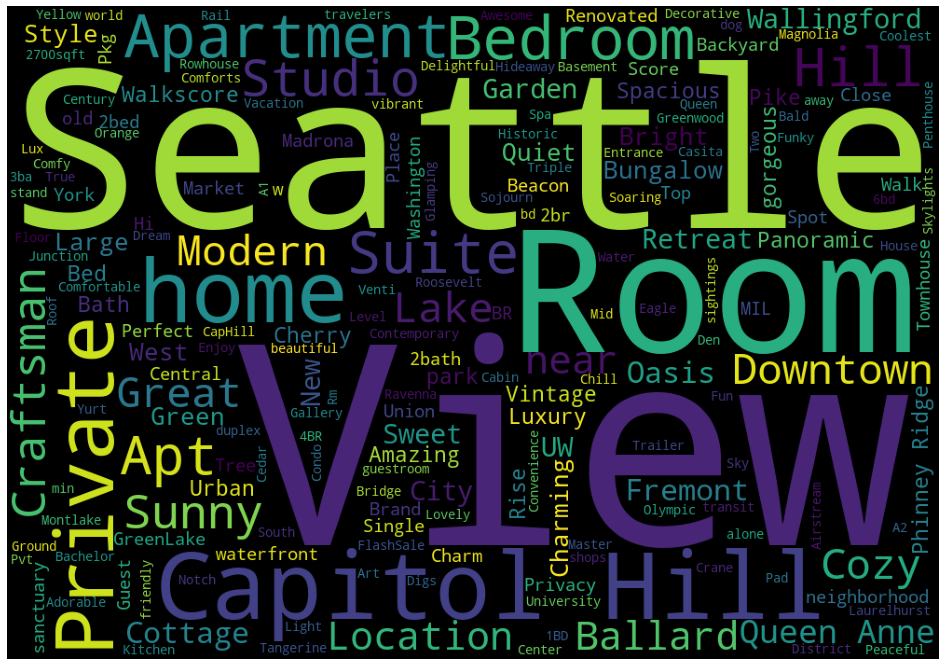

In [268]:
plot_word_cloud(top_performer_common_names)

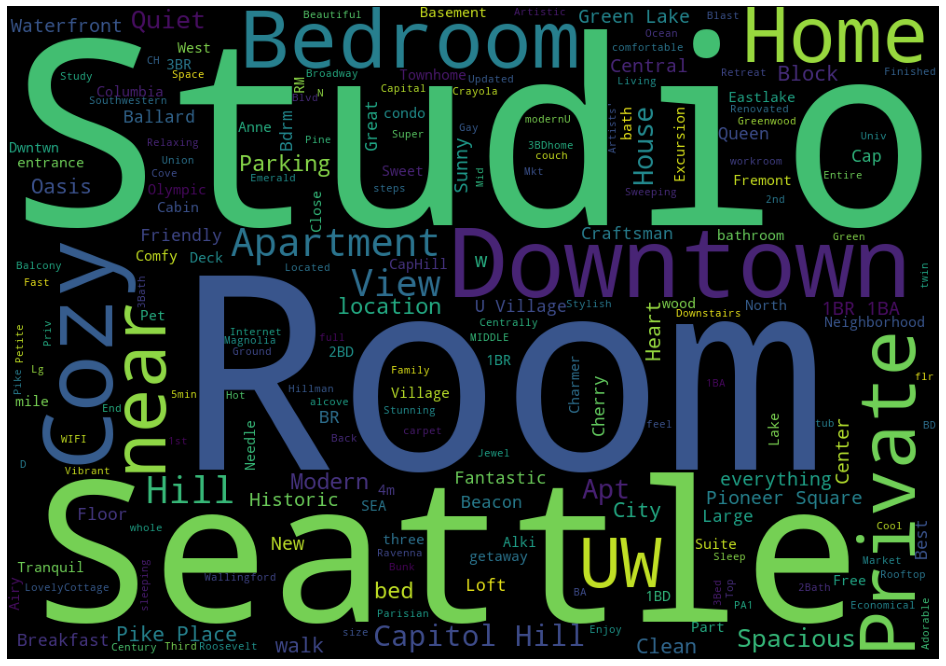

In [219]:
plot_word_cloud(worst_performer_common_names)

In [243]:
def count_and_sort_word_occurence(performer_string):
    counts = dict()
    words = performer_string.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    sorted_result = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))
    return sorted_result

In [244]:
top_used_words = count_and_sort_word_occurence(top_performer_common_names)
worst_used_words = count_and_sort_word_occurence(worst_performer_common_names)

In [245]:
top_used_words

{'Hill': 23,
 'Seattle': 17,
 'Capitol': 16,
 'Apartment': 9,
 'Bedroom': 9,
 'View': 9,
 'Room': 9,
 'Sunny': 8,
 'Craftsman': 8,
 'Queen': 8,
 'home': 8,
 'Private': 8,
 'Lake': 8,
 'Anne': 7,
 'room': 7,
 'Modern': 7,
 'Apt': 6,
 'with': 6,
 'Views': 6,
 'Cozy': 6,
 'Home': 6,
 'Ballard': 6,
 'Wallingford': 5,
 'Downtown': 5,
 'Suite': 5,
 'Studio': 5,
 'Fremont': 5,
 'Great': 5,
 'City': 5,
 'UW': 5,
 'Charming': 4,
 'near': 4,
 'Bungalow': 4,
 'Sweet': 4,
 'Location': 4,
 'Garden': 4,
 'West': 4,
 'Cottage': 3,
 'Urban': 3,
 'Vintage': 3,
 'Pike': 3,
 'Phinney': 3,
 'Ridge': 3,
 'Near': 3,
 'suite': 3,
 'Green': 3,
 'Retreat': 3,
 'cottage': 3,
 'Oasis': 3,
 'Bright': 3,
 'Cherry': 3,
 'Large': 3,
 'Amazing': 3,
 'BR': 2,
 'at': 2,
 'Guest': 2,
 'Hi-Rise.': 2,
 '98': 2,
 'Walkscore': 2,
 'Beacon': 2,
 '1908': 2,
 'Pkg': 2,
 'Place': 2,
 'Market': 2,
 'Central': 2,
 'New': 2,
 'studio': 2,
 'private': 2,
 'bedroom': 2,
 'great': 2,
 'location': 2,
 'for': 2,
 'Brand': 2,
 'gorgeous

In [248]:
worst_used_words

{'Hill': 17,
 'Seattle': 16,
 'Cozy': 16,
 'Studio': 12,
 'Room': 11,
 'Downtown': 10,
 'Capitol': 10,
 'Bedroom': 10,
 'Private': 9,
 'UW': 8,
 'Apartment': 8,
 'Apt': 8,
 'near': 7,
 'Home': 7,
 'Near': 7,
 'View': 6,
 'Quiet': 6,
 'from': 6,
 'home': 6,
 'downtown': 6,
 'House': 6,
 'Lake': 6,
 'Modern': 5,
 'Spacious': 5,
 'room': 5,
 'City': 5,
 'private': 5,
 'Green': 5,
 'studio': 5,
 'Oasis': 5,
 'Center': 4,
 'Sunny': 4,
 'bedroom': 4,
 '1BR/1BA': 4,
 'Pike': 4,
 'Historic': 4,
 'Village': 3,
 'Loft': 3,
 'Parking': 3,
 'Fantastic': 3,
 'location!': 3,
 'U': 3,
 'Cap': 3,
 'Place': 3,
 'Heart': 3,
 'Queen': 3,
 'Floor': 3,
 'Location': 3,
 'a': 3,
 '@': 3,
 'Cherry': 3,
 'Views': 3,
 'Friendly': 3,
 'Central': 3,
 'BR': 3,
 'Beacon': 3,
 'Waterfront': 3,
 'Pioneer': 3,
 'Square': 3,
 'UW,': 2,
 '4': 2,
 'New': 2,
 'Olympic': 2,
 '4m': 2,
 '2BD': 2,
 'w': 2,
 'Walk': 2,
 'apartment': 2,
 'block': 2,
 'wood': 2,
 'North': 2,
 'entrance': 2,
 'bath': 2,
 'Clean': 2,
 'parking': 2

## What makes a good description?

In [297]:
top_performer_common_description = get_most_common_words(top_performer_df, 'amenities')
worst_performer_common_description = get_most_common_words(worst_performer_df, 'amenities')

In [303]:
top_performer_common_description

'{TV,"Cable TV",Internet,"Wireless Internet",Kitchen,Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","Fire Extinguisher",Essentials,Shampoo,"24-Hour Check-in",Hangers,"Hair Dryer",Iron,"Laptop Friendly Workspace"} {TV,"Cable TV",Internet,"Wireless Internet",Kitchen,"Free Parking Premises",Breakfast,Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Fire Extinguisher",Essentials,Shampoo} {Internet,"Wireless Internet",Kitchen,"Pets live property",Dog(s),Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Fire Extinguisher",Essentials,Shampoo} {TV,"Cable TV",Internet,"Wireless Internet",Kitchen,Gym,"Elevator Building","Buzzer/Wireless Intercom",Heating,Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","First Aid Kit","Safety Card","Fire Extinguisher",Essentials,Shampoo,"24-Hour Check-in",Hangers,"Hair Dryer",Iron,"Laptop Friendly Workspace"} {TV,"Cable TV",Internet,"Wireless Internet",Kitchen,"Free Parking Premises","Indoor 

In [299]:
top_performer_description = count_and_sort_word_occurence(top_performer_common_description)
worst_performer_description = count_and_sort_word_occurence(worst_performer_common_description)

In [300]:
top_performer_description

{'Detector","Carbon': 111,
 'Monoxide': 111,
 'Aid': 95,
 'Detector","First': 94,
 'Parking': 93,
 '{TV,"Cable': 65,
 'Internet",Kitchen,"Free': 65,
 'Friendly",Washer,Dryer,"Smoke': 60,
 'Extinguisher",Essentials,Shampoo}': 60,
 'TV",Internet,"Wireless': 59,
 'live': 50,
 '{TV,Internet,"Wireless': 45,
 'Kit","Fire': 43,
 'Card","Fire': 41,
 'Kit","Safety': 39,
 'Premises","Pets': 36,
 'Friendly': 31,
 'Workspace"}': 31,
 'Internet","Air': 31,
 'Dryer",Iron,"Laptop': 28,
 'Detector","Fire': 25,
 'Check-in",Hangers,"Hair': 23,
 'Fireplace",Heating,"Family/Kid': 20,
 'Extinguisher",Essentials,Shampoo,"24-Hour': 19,
 'Conditioning",Kitchen,"Free': 16,
 'Premises",Heating,"Family/Kid': 15,
 '{Internet,"Wireless': 14,
 'Premises","Indoor': 13,
 'Fireplace",Heating,Washer,Dryer,"Smoke': 13,
 '{"Wireless': 13,
 'TV","Wireless': 11,
 'Building","Buzzer/Wireless': 10,
 'Internet",Kitchen,"Pets': 9,
 'Detector",Essentials,Shampoo}': 9,
 'Extinguisher",Shampoo}': 9,
 'Events",Washer,Dryer,"Smoke'

In [301]:
worst_performer_description

{'Parking': 80,
 'Detector","Carbon': 79,
 'Monoxide': 79,
 'Internet",Kitchen,"Free': 58,
 'Detector","First': 51,
 'Aid': 51,
 '{TV,"Cable': 48,
 '{Internet,"Wireless': 43,
 'Friendly",Washer,Dryer,"Smoke': 43,
 'TV",Internet,"Wireless': 41,
 'Extinguisher",Essentials,Shampoo}': 39,
 'Premises","Pets': 30,
 'Kit","Fire': 30,
 'Detector","Fire': 27,
 '{TV,Internet,"Wireless': 25,
 'live': 24,
 '{"Wireless': 20,
 'Detector",Essentials,Shampoo}': 19,
 'Card","Fire': 19,
 'Extinguisher",Essentials}': 17,
 'Premises",Heating,"Family/Kid': 16,
 'Internet",Kitchen,Heating,Washer,Dryer,"Smoke': 16,
 'Fireplace",Heating,"Family/Kid': 13,
 'Intercom",Heating,"Family/Kid': 13,
 'TV","Wireless': 11,
 'Building","Buzzer/Wireless': 11,
 'Detector","Safety': 11,
 'Detector",Essentials}': 10,
 'Internet","Free': 10,
 'Kit","Safety': 9,
 'Internet","Wheelchair': 9,
 'Friendly","Suitable': 8,
 'Events",Washer,Dryer,"Smoke': 8,
 'Kit",Essentials,Shampoo}': 8,
 'Friendly': 8,
 'Workspace"}': 8,
 'Intern

In [ ]:
top_performer_df